In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Ensure stopwords and wordnet are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load the stopwords list
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # 1. Lower Case
    text = text.lower()
    
    # 2. Remove Links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # 3. Remove New Lines (\n)
    text = text.replace('\n', ' ')
    
    # 4. Remove Words Containing Numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # 5. Remove Extra Spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 6. Remove Special Characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 7. Remove Stop Words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # 8. Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    # 9. Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# File paths
train_path = r'D:\archive\all_data\train\radiologytraindata.csv'
val_path = r'D:\archive\all_data\validation\radiologyvaldata.csv'
test_path = r'D:\archive\all_data\test\radiologytestdata.csv'

# Load the data
train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)
#test_data = pd.read_csv(test_path)

# Combine all data for preprocessing
combined_data = pd.concat([train_data])  # val_data, test_data

# Apply preprocessing to the caption column
combined_data['caption'] = combined_data['caption'].apply(preprocess_text)

# Check the result
print(combined_data['caption'].head())

# Split data back into train, validation, and test sets
train_data = combined_data.iloc[:len(train_data)]
#val_data = combined_data.iloc[len(train_data):len(train_data) + len(val_data)]
#test_data = combined_data.iloc[len(train_data) + len(val_data):]

print(train_data.shape)
#print(val_data.shape)
#print(test_data.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ry981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ry981\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    comput tomographi scan axial view show obliter...
1    bacteri contamin occur complet root canal trea...
2    patient residu paralysi hand poliomyel necessa...
3                       panoram radiograph immedi load
4    plain abdomen xray multipl air level midabdome...
Name: caption, dtype: object
(65450, 3)


In [17]:
import pandas as pd

# Define the path to the CSV file
train_path = r'D:\archive\all_data\train\radiologytraindata.csv'

# Load the CSV file into a DataFrame
train_data = pd.read_csv(train_path)

# Display the first few rows of the DataFrame to verify it was loaded correctly
print(train_data.head())


           id                                    name  \
0  ROCO_00002          PMC4083729_AMHSR-4-14-g002.jpg   
1  ROCO_00003       PMC2837471_IJD2009-150251.001.jpg   
2  ROCO_00004  PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3  ROCO_00005       PMC3745845_IJD2013-683423.005.jpg   
4  ROCO_00007   PMC4917066_amjcaserep-17-301-g001.jpg   

                                             caption  
0   Computed tomography scan in axial view showin...  
1   Bacterial contamination occurred after comple...  
2   The patient had residual paralysis of the han...  
3    Panoramic radiograph after immediate loading.\n  
4   Plain abdomen x-ray: Multiple air levels at t...  


In [21]:
import pandas as pd
import os
import cv2
from tqdm import tqdm

# Define paths to CSV files for train, validation, and test sets
train_path = r'D:\archive\all_data\train\radiology\traindata.csv'

# Load the data
train_data = pd.read_csv(train_path)

# Directory containing the images
image_dir = r'D:\archive\all_data\train\radiology\images'

# Initialize a list to hold missing images
missing_images = []

# Identify missing images
for img_name in tqdm(train_data['name'], desc="Checking images"):
    img_path = os.path.join(image_dir, img_name)
    if not os.path.exists(img_path):
        missing_images.append(img_name)

# Print number of missing images
print(f"Number of missing images: {len(missing_images)}")

# Remove rows with missing images from the DataFrame
train_data_cleaned = train_data[~train_data['name'].isin(missing_images)]

# Save the cleaned data to a new CSV file
cleaned_csv_path = r'D:\archive\all_data\train\radiology\cleaned_traindata.csv'
train_data_cleaned.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned data saved to {cleaned_csv_path}")

Checking images: 100%|██████████| 65450/65450 [00:13<00:00, 4897.18it/s] 


Number of missing images: 30
Cleaned data saved to D:\archive\all_data\train\radiology\cleaned_traindata.csv


Processing images: 100%|██████████| 1825/1825 [00:20<00:00, 88.74it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of missing images: 0
(1825, 5)


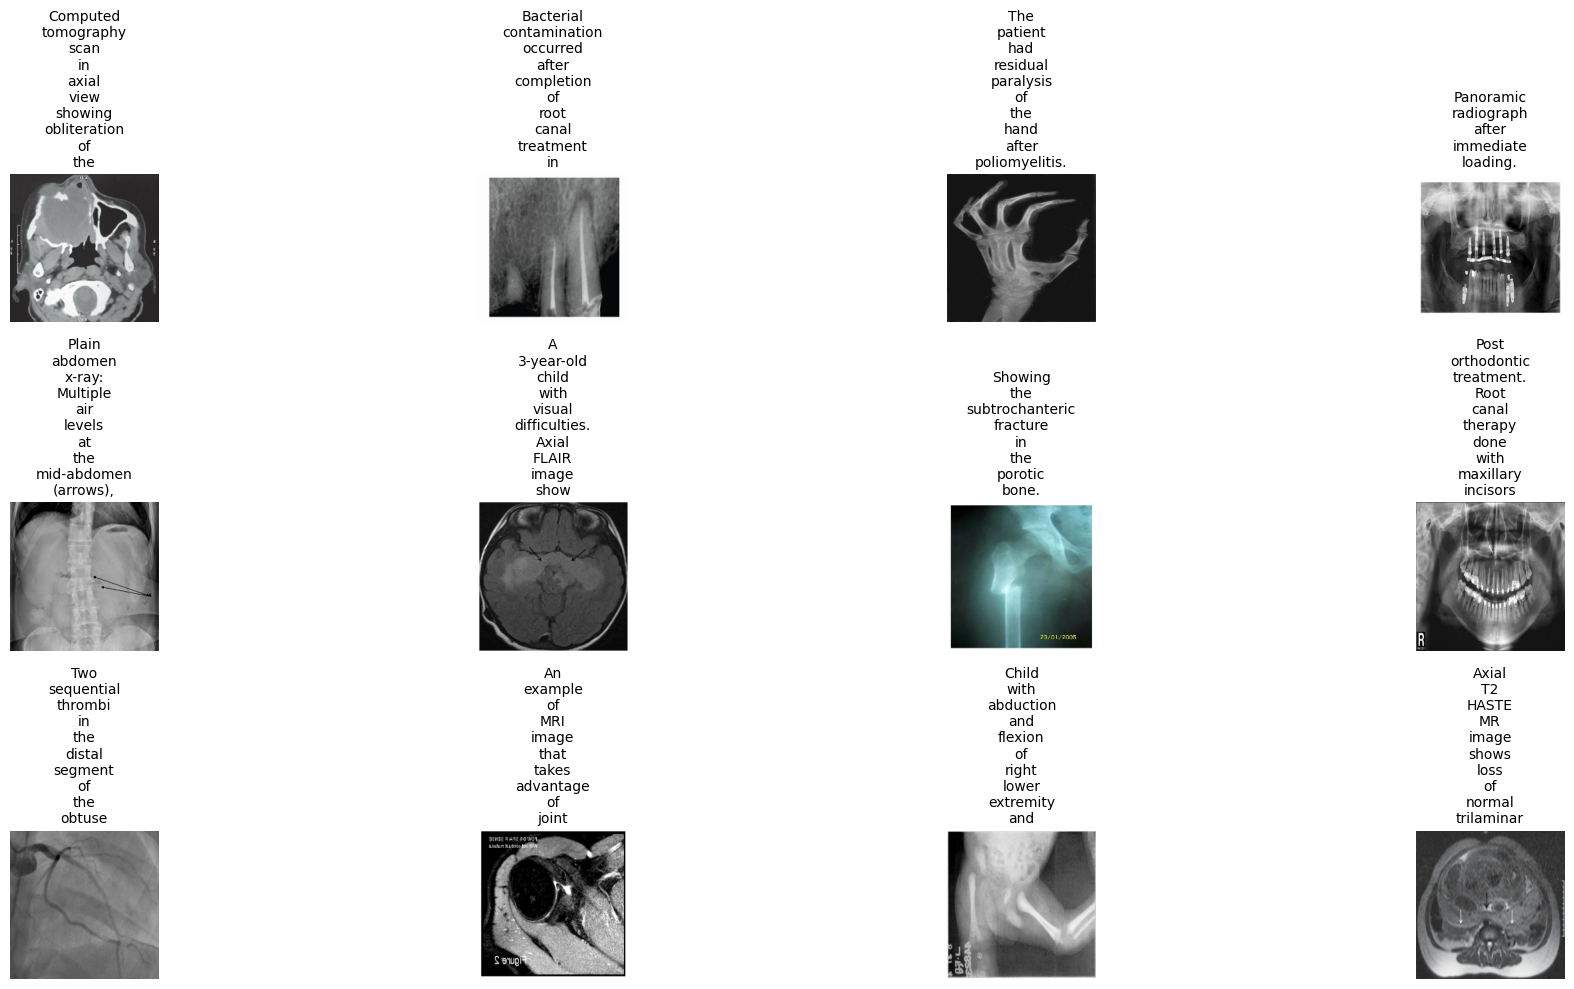

In [1]:
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define image loading function using TensorFlow
def load_image(image_path):
    image = tf.io.read_file(image_path)  # Read image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image
    return image

# Define image preprocessing function using TensorFlow
def preprocess_image(image, target_size=(224, 224)):
    image = tf.image.resize(image, target_size)  # Resize the image
    image = tf.image.random_flip_left_right(image)  # Random flip
    image = tf.image.random_brightness(image, max_delta=0.1)  # Random brightness
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Random contrast
    image = image / 255.0  # Normalize pixel values
    return image

# File path for training data
train_path = r'D:\archive\all_data\train\radiology\traindata.csv'

# Load the preprocessed text data
train_data = pd.read_csv(train_path)

# Ensure 'cleaned_caption' column exists, if not, use 'caption' column
if 'cleaned_caption' not in train_data.columns:
    train_data['cleaned_caption'] = train_data['caption']

# Limit to the first 1825 images
train_data = train_data.head(1825)

# Directory containing the images
image_dir = r'D:\archive\all_data\train\radiology\images'

# Load images and check for missing ones
image_data = []
missing_images = []

# Process images
for img_name in tqdm(train_data['name'], desc="Processing images"):
    img_path = os.path.join(image_dir, img_name)
    try:
        img = load_image(img_path)
        img = preprocess_image(img)
        image_data.append(img.numpy())  # Convert Tensor to NumPy array
    except Exception as e:
        print(f"Error loading image {img_name}: {e}")
        missing_images.append(img_name)

# Report missing images
print(f"Number of missing images: {len(missing_images)}")
if missing_images:
    print("Missing images:")
    for img_name in missing_images[:10]:  # Print only first 10 missing images for brevity
        print(img_name)

# Filter out rows with missing images
train_data = train_data[~train_data['name'].isin(missing_images)]

# Add the processed images to the DataFrame
train_data = train_data.iloc[:len(image_data)]
train_data['image'] = image_data

# Display the shape of the data
print(train_data.shape)

# Display the first 12 images and their cleaned captions
if not train_data.empty:
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    for i, ax in enumerate(axs.flatten()):
        if i < len(train_data):
            example_row = train_data.iloc[i]
            ax.imshow(example_row['image'])
            caption = example_row['cleaned_caption']
            ax.set_title("\n".join(caption.split()[:10]), fontsize=10)
            ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images were loaded successfully.")